In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
/bin/rm -rf ./param
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
find_chandra_obsid "Mrk 975"

# obsid  sepn   inst grat   time    obsdate    piname    target
13899     0.0 ACIS-S NONE   10.0 2012-10-28 Mushotzky "Mrk 975"
15575     0.0 ACIS-S NONE    9.1 2012-11-02 Mushotzky "Mrk 975"


In [3]:
/bin/rm -rf 13899 15575
download_chandra_obsid 13899,15575 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  asol     fits        2 Mb  ####################          < 1 s  44390.3 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  18524.4 kb/s
  evt1     fits      632 Kb  ####################          < 1 s  23952.2 kb/s
  stat     fits      311 Kb  ####################          < 1 s  17865.7 kb/s
  aqual    fits      176 Kb  ####################          < 1 s  12857.7 kb/s
  bias     fits       67 Kb  ####################          < 1 s  5980.4 kb/s
  cntr_img jpg        59 Kb  ####################          < 1 s  5865.4 kb/s
  vv       pdf        38 Kb  ####################          < 1 s  3681.1 kb/s
  oif      fits       20 Kb  ####################          < 1 s  2103.8 kb/s
  cntr_img fits       17 Kb  ####################          < 1 s  1859.8 kb/s
  full_img fits       12 Kb  ####################         

In [4]:
chandra_repro 13899,15575 outdir=""


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/fluxes_multiobi/13899'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/fluxes_multiobi/13899/repro/acisf13899_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...

Cleaning up intermediate files

The data have been reprocessed.
Start your analysis with the new products in
/proj/sds/Staff/kjg/Threads/fluxes_multiobi/13899/repro


Processing input directory '/proj/sds/Staff/kjg/Threads/fluxes_multiobi/15575'

No boresight correction update to asol file 

In [5]:
dmdiff 13899/repro/*evt2.fits 15575/repro/*evt2.fits data- | \
  egrep 'SIM_|_NOM|_PNT|DATE-OBS|MJD_OBS|OBS_ID|FP_TEMP' 

DATE-OBS Values are not equal                   2012-10-28T12:07:12  2012-11-02T20:41:44
SIM_Z    Values are not equal                   -190.14006604987  -190.14258036517  -0.00251432 (+0.00132%)
RA_PNT   Values are not equal                    18.460110371879  18.460525677222  +0.000415305 (+0.00225%)
DEC_PNT  Values are not equal                    13.273523446552  13.272951427789  -0.000572019 (-0.00431%)
ROLL_PNT Values are not equal                    278.15394087308  278.15381775507  -0.000123118 (-4.43e-05%)
RA_NOM   Values are not equal                    18.460110371879  18.460525677222  +0.000415305 (+0.00225%)
DEC_NOM  Values are not equal                    13.273523446552  13.272951427789  -0.000572019 (-0.00431%)
ROLL_NOM Values are not equal                    278.15394087308  278.15381775507  -0.000123118 (-4.43e-05%)
OBS_ID   Values are not equal                              13899  15575           


[1] 32848
[1]+  Done                    ds9 -tile -log 13899/repro/acisf13899_repro_evt2.fits -zoom to 8 -pan to 01:13:51.0426 +13:16:17.594 fk5 15575/repro/acisf15575_repro_evt2.fits -zoom to 8 -pan to 01:13:51.0426 +13:16:17.594 fk5 -saveimage png simple_01.png


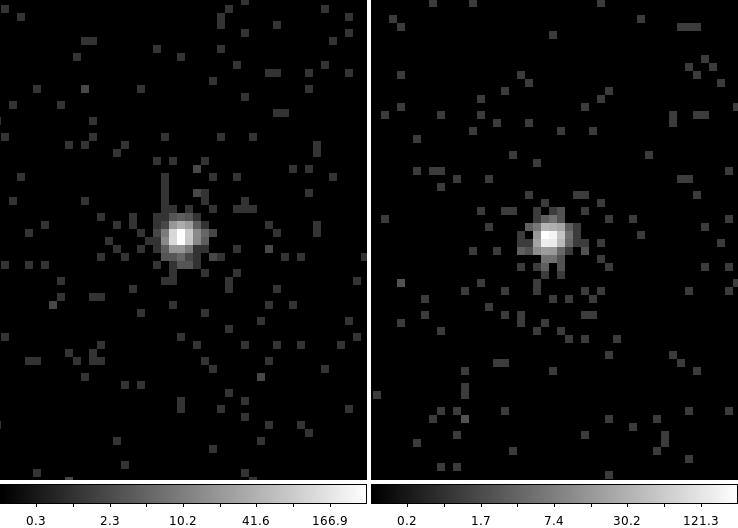

In [6]:
ds9 -tile -log \
  13899/repro/acisf13899_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.0426 +13:16:17.594 fk5 \
  15575/repro/acisf15575_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.0426 +13:16:17.594 fk5 \
  -saveimage png simple_01.png &

sleep 10
xpaset -p ds9 quit
display < simple_01.png


In [7]:
dmstat 13899/repro/acisf13899_repro_evt2.fits'[energy=500:7000,sky=circle(01:13:51.0436,+13:16:17.594,4")][bin sky=1]' \
      centroid=yes verb=0  
pget dmstat out_cntrd_phys
x=$(stk_read_num ")dmstat.out_cntrd_phys" 1 echo+)
y=$(stk_read_num ")dmstat.out_cntrd_phys" 2 echo+)
punlearn dmcoords
dmcoords 13899/repro/acisf13899_repro_evt2.fits op=sky x=$x y=$y celfmt=hms v=0
pget dmcoords ra dec


4077.8910965,4082.5180297
01:13:51.053
+13:16:17.80


In [8]:
dmstat 15575/repro/acisf15575_repro_evt2.fits'[energy=500:7000,sky=circle(01:13:51.0436,+13:16:17.594,4")][bin sky=1]' \
      centroid=yes verb=0 
pget dmstat out_cntrd_phys
x=$(stk_read_num ")dmstat.out_cntrd_phys" 1 echo+)
y=$(stk_read_num ")dmstat.out_cntrd_phys" 2 echo+)
punlearn dmcoords
dmcoords 15575/repro/acisf15575_repro_evt2.fits op=sky x=$x y=$y celfmt=hms v=0
pget dmcoords ra dec


4080.5849903,4086.5903161
01:13:51.062
+13:16:17.74


In [9]:
merge_obs 13899/repro,15575/repro out=merge/ bin=1 band=broad psfecf=0.9 clob+


Running merge_obs
Version: 05 November 2021

Found 13899/repro/acisf13899_repro_evt2.fits
Found 15575/repro/acisf15575_repro_evt2.fits
Verifying 2 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=1h 13m 50.476s Dec=13d 16' 23.65"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 13899 2012-10-28  10.0 ACIS-7      -190.140 153.3  < 3"   -35
2 15575 2012-11-02   9.1 ACIS-7      -190.143 153.3  < 3"  +145

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merge/merged_evt.fits

Calculating the output grid

The merged images will have 312 by 1070 pixels, a pixel size of 0.492 arcsec,
    and cover x=3962.5:4274.5:1, y=3852.5:4922.5:1.

Creating the fluxed images for 2 obse

[1] 42103
[1]+  Done                    ds9 -log merge/broad_thresh.img -pan to 01:13:51.0436 +13:16:17.594 wcs -zoom to 4 -scale limits 0 25 -region command 'fk5;circle(01:13:51.0436,+13:16:17.594,4")' -saveimage png simple_02.png


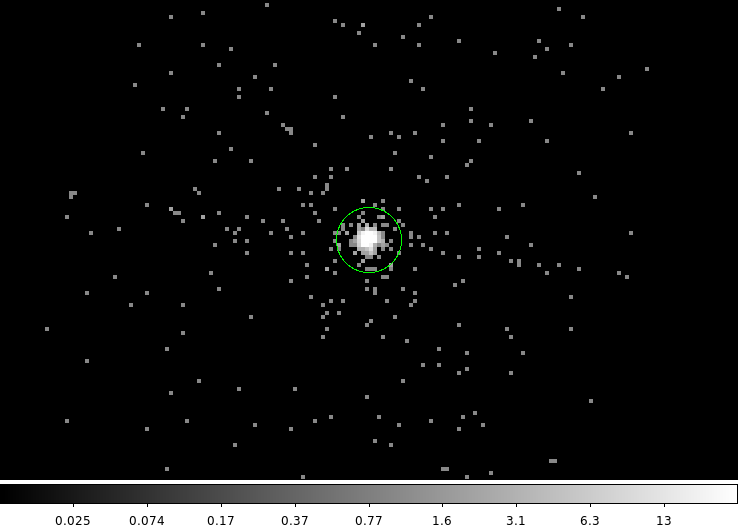

In [10]:
ds9 -log merge/broad_thresh.img \
  -pan to 01:13:51.0436 +13:16:17.594 wcs \
  -zoom to 4 -scale limits 0 25 \
  -region format ds9 \
  -region command 'fk5;circle(01:13:51.0436,+13:16:17.594,4")' \
  -saveimage png simple_02.png &

sleep 10
xpaset -p ds9 quit
display < simple_02.png

In [11]:
punlearn wavdetect 
pset wavdetect \
  infile=merge/broad_thresh.img \
  expfile=merge/broad_thresh.expmap \
  psffile=merge/broad_thresh.psfmap \
  outfile=merge/wav.src \
  scell=merge/wav.cell defnbkg=merge/wav.nbk imagef=merge/wav.recon \
  scale="1.4 2 4" mode=h clob+
  
wavdetect mode=h


In [12]:
dmlist merge/wav.src counts

2       


[1] 43406
[1]+  Done                    ds9 -log merge/broad_thresh.img -region merge/wav.src -block to 2 -saveimage png simple_03.png


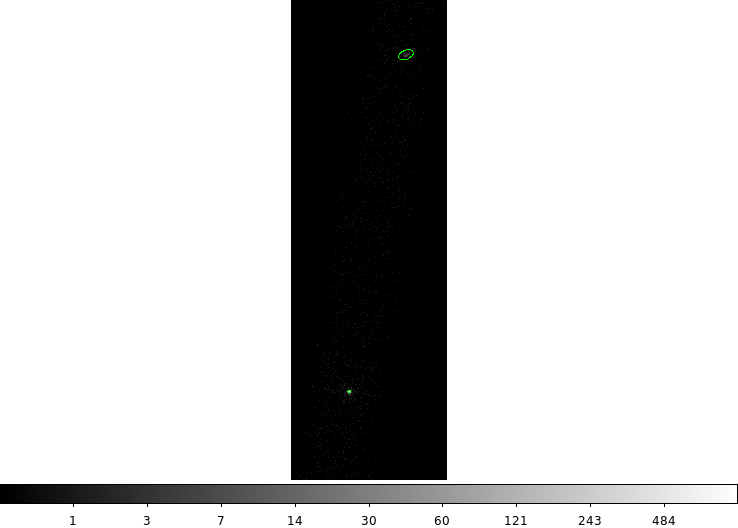

In [13]:
ds9 -log merge/broad_thresh.img -region merge/wav.src -block to 2 \
  -saveimage png simple_03.png &

sleep 10
xpaset -p ds9 quit
display < simple_03.png

In [14]:
dmlist merge/wav.src"[cols x,y,ra,dec][#row=1]" data,clean

#  POS(X,Y)                                 RA                   DEC
      4079.2460881935      4084.6097676624        18.4627407642        13.2716124274


In [15]:
rr=`dmkeypar merge/wav.src ra echo+`
dd=`dmkeypar merge/wav.src dec echo+`
echo $rr $dd
prop_precess from j/deg to j/hms p0 eval $rr $dd

18.4627407641533 13.271612427391
01 13 51.06 +13 16 17.80


In [16]:
dmstat 'merge/broad_thresh.img[sky=circle(01:13:51.0436,+13:16:17.594,4")]' cen+ v=0
pget dmstat out_cntrd_phys
x=$(stk_read_num ")dmstat.out_cntrd_phys" 1 echo+)
y=$(stk_read_num ")dmstat.out_cntrd_phys" 2 echo+)
punlearn dmcoords 
dmcoords merge/broad_thresh.img op=sky x=$x y=$y celfmt=hms verb=0
pget dmcoords ra dec


4079.2495379,4084.5799445
01:13:51.057
+13:16:17.79


In [19]:
/bin/ls 13899/repro/*evt2.fits 15575/repro/*evt2.fits > evt.lis
cat evt.lis

13899/repro/acisf13899_repro_evt2.fits
15575/repro/acisf15575_repro_evt2.fits


In [20]:
punlearn srcflux
srcflux \
  infile=@evt.lis \
  out=sf1/out \
  srcreg="" bkgreg="" \
  pos="01:13:51.048,+13:16:17.84" \
  psfmethod=arfcorr bkgresp=no conf=0.68 \
  mode=h clob+


srcflux
          infile = @evt.lis
             pos = 01:13:51.048,+13:16:17.84
         outroot = sf1/out
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = no
       psfmethod = arfcorr
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Combining PSF fractions together
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
G

[1] 14764
[1]+  Done                    ds9 -tile -log 13899/repro/acisf13899_repro_evt2.fits -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 -region sf1/out_obi001_0001_srcreg.fits 15575/repro/acisf15575_repro_evt2.fits -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 -region sf1/out_obi002_0001_srcreg.fits -saveimage simple_04.png


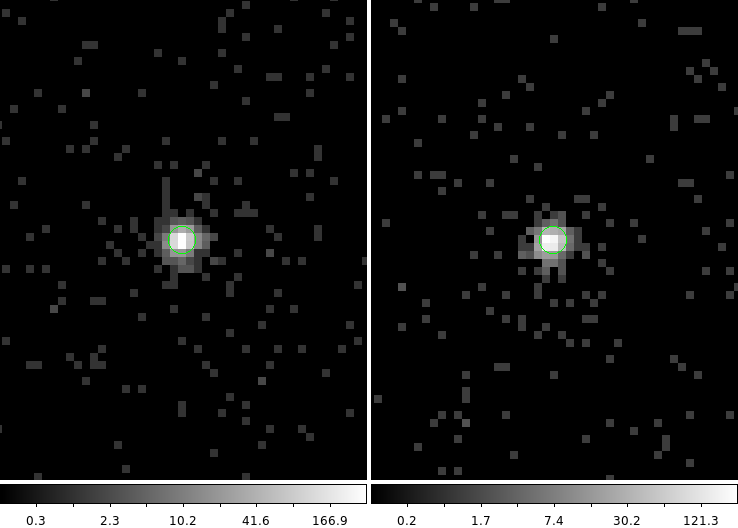

In [21]:
ds9 -tile -log \
  13899/repro/acisf13899_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 \
  -region sf1/out_obi001_0001_srcreg.fits \
  15575/repro/acisf15575_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 \
  -region sf1/out_obi002_0001_srcreg.fits \
  -saveimage simple_04.png &
  
sleep 10
xpaset -p ds9 quit
display < simple_04.png

In [22]:
punlearn srcflux
srcflux \
  infile=@evt.lis \
  out=sf2/out \
  pos="01:13:51.048,+13:16:17.84" \
  srcreg="circle(01:13:51.048,+13:16:17.84,5)" \
  bkgreg="annulus(01:13:51.048,+13:16:17.84,6,12)" \
  psfmethod=arfcorr bkgresp=no conf=0.68 \
  mode=h clob+

srcflux
          infile = @evt.lis
             pos = 01:13:51.048,+13:16:17.84
         outroot = sf2/out
           bands = default
          srcreg = circle(01:13:51.048,+13:16:17.84,5)
          bkgreg = annulus(01:13:51.048,+13:16:17.84,6,12)
         bkgresp = no
       psfmethod = arfcorr
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Combining PSF fractions together
Getting net rate and c

[1] 17520
[1]+  Done                    ds9 -tile -log 13899/repro/acisf13899_repro_evt2.fits -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 -region sf2/out_obi001_0001_srcreg.fits 15575/repro/acisf15575_repro_evt2.fits -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 -region sf2/out_obi002_0001_srcreg.fits -saveimage png simple_05.png


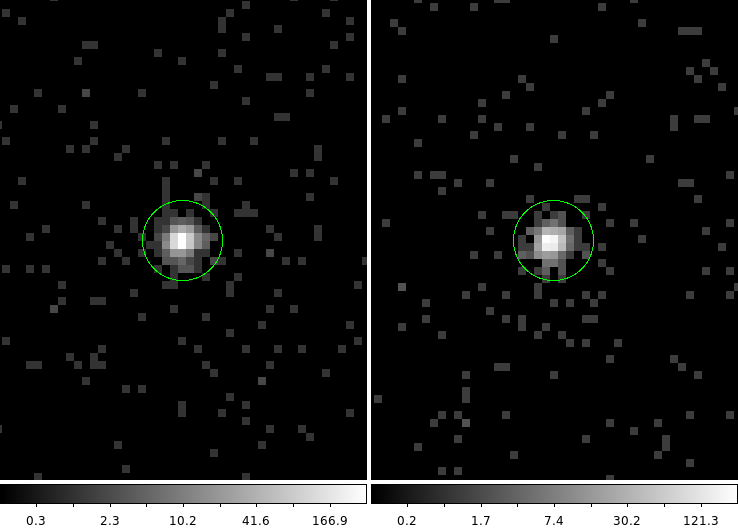

In [23]:
ds9 -tile -log \
  13899/repro/acisf13899_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 \
  -region sf2/out_obi001_0001_srcreg.fits \
  15575/repro/acisf15575_repro_evt2.fits \
  -zoom to 8 -pan to 01:13:51.048 +13:16:17.84 fk5 \
  -region sf2/out_obi002_0001_srcreg.fits \
  -saveimage png simple_05.png &

sleep 10
xpaset -p ds9 quit
display < simple_05.png

In [24]:
dmdiff sf1/out_broad.flux sf2/out_broad.flux  || echo

Infile 1:  sf1/out_broad.flux
Infile 2:  sf2/out_broad.flux

----------------------------------------------------------------------
Compare Headers
----------------------------------------------------------------------
Compare Key Lists:
Compare Keyword Details:
# dmdiff (CIAO 4.14): WARNING: keyword 'CHECKSUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="HDU checksum updated 2022-02-23T13:00:31"
# dmdiff (CIAO 4.14):   comment2="HDU checksum updated 2022-02-23T14:16:37"
# dmdiff (CIAO 4.14): WARNING: keyword 'DATASUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="data unit checksum updated 2022-02-23T13:00:31"
# dmdiff (CIAO 4.14):   comment2="data unit checksum updated 2022-02-23T14:16:37"
Compare Keyword Values:
Keyword: Message:                                                        Value(s):                    Diff:
-------- -------------------------------------- ---------------------------------- ------------------------
CHECKSUM Values are not equal                   

## Longer case, astro offsets


In [25]:
find_chandra_obsid "12:26:51" "-33:16:12"

# obsid  sepn   inst grat   time    obsdate  piname   target
18898     0.0 ACIS-S NONE   35.4 2017-04-09 Kastner "TWA 32"
20056     0.0 ACIS-S NONE   24.2 2017-04-14 Kastner "TWA 32"


In [26]:
/bin/rm -rf 18898 20056
download_chandra_obsid 18898,20056 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       87 Mb  ####################            2 s  46969.9 kb/s
  asol     fits        8 Mb  ####################          < 1 s  51989.6 kb/s
  mtl      fits        1 Mb  ####################          < 1 s  31522.5 kb/s
  stat     fits      839 Kb  ####################          < 1 s  27211.6 kb/s
  aqual    fits      533 Kb  ####################          < 1 s  25357.0 kb/s
  bias     fits      504 Kb  ####################          < 1 s  22184.9 kb/s
  bias     fits      469 Kb  ####################          < 1 s  19553.2 kb/s
  bias     fits      443 Kb  ####################          < 1 s  21350.4 kb/s
  bias     fits      433 Kb  ####################          < 1 s  24168.8 kb/s
  cntr_img jpg       338 Kb  ####################          < 1 s  18016.9 kb/s
  full_img jpg        56 Kb  ####################    

In [27]:
chandra_repro 18898,20056 out= verb=0


Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 16 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 10 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.


[1] 22940
[1]+  Done                    ds9 -tile -log -zoom to 4 "18898/repro/acisf18898_repro_evt2.fits[events,energy=500:7000]" -pan to 12:26:51 -33:16:13 fk5 "20056/repro/acisf20056_repro_evt2.fits[events,energy=500:7000]" -pan to 12:26:51 -33:16:13 fk5 -match frame wcs -saveimage longer_06.png


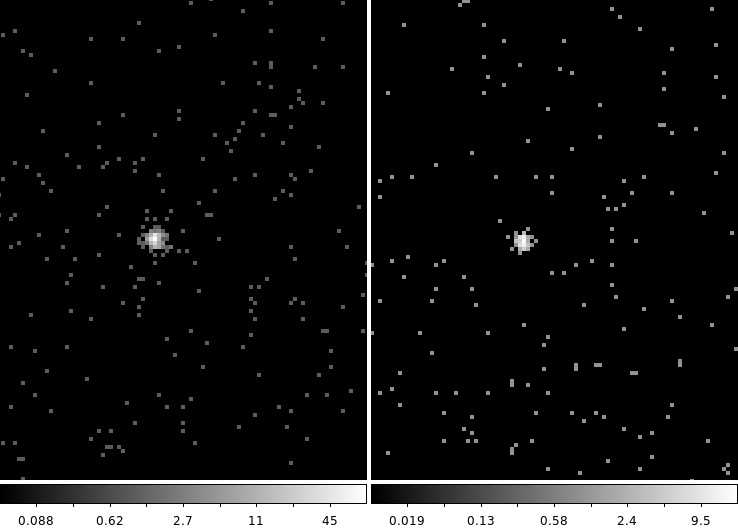

In [28]:
ds9 -tile -log -zoom to 4 \
  "18898/repro/acisf18898_repro_evt2.fits[events,energy=500:7000]" \
  -pan to 12:26:51 -33:16:13 fk5 \
  "20056/repro/acisf20056_repro_evt2.fits[events,energy=500:7000]" \
  -pan to 12:26:51 -33:16:13 fk5 \
  -match frame wcs \
  -saveimage longer_06.png &

sleep 10
xpaset -p ds9 quit
display < longer_06.png

In [29]:
dmstat "18898/repro/acisf18898_repro_evt2.fits[energy=500:7000,sky=circle(12:26:51,-33:16:13,10)][bin sky=0.5]" cen+ v=0
pget dmstat out_cntrd_phys
xx=$(pget dmstat out_cntrd_phys | cut -d, -f1)
yy=$(pget dmstat out_cntrd_phys | cut -d, -f2)

punlearn dmcoords
dmcoords 18898/repro/acisf18898_repro_evt2.fits op=sky x=$xx y=$yy celfmt=hms v=0
pget dmcoords ra dec


4078.2387641,4097.9778384
12:26:51.267
-33:16:12.86


In [30]:
dmstat "20056/repro/acisf20056_repro_evt2.fits[energy=500:7000,sky=circle(12:26:51,-33:16:13,10)][bin sky=0.5]" cen+ v=0
pget dmstat out_cntrd_phys
xx=$(pget dmstat out_cntrd_phys | cut -d, -f1)
yy=$(pget dmstat out_cntrd_phys | cut -d, -f2)

punlearn dmcoords
dmcoords 20056/repro/acisf20056_repro_evt2.fits op=sky x=$xx y=$yy celfmt=hms v=0
pget dmcoords ra dec


4074.0906969,4096.6382979
12:26:51.288
-33:16:13.19


In [31]:
mkdir fine_astro
echo "#ra dec" > fine_astro/18898.dat
punlearn dmcoords
dmcoords 18898/repro/acisf18898_repro_evt2.fits op=sky x=4078.2387641 y=4097.9778384 celfmt=deg v=0
pget dmcoords ra dec | paste - - >> fine_astro/18898.dat
cat fine_astro/18898.dat 

mkdir: cannot create directory 'fine_astro': File exists
#ra dec
186.713616315192	-33.27024113433137


In [32]:
echo "#ra dec" > fine_astro/20056.dat
punlearn dmcoords
dmcoords 20056/repro/acisf20056_repro_evt2.fits op=sky x=4074.0906969 y=4096.6382979 celfmt=deg v=0
pget dmcoords ra dec | paste - - >> fine_astro/20056.dat
cat fine_astro/20056.dat

#ra dec
186.7137022423231	-33.27033241498094


In [33]:
punlearn wcs_match
wcs_match \
  infile=fine_astro/18898.dat \
  ref=fine_astro/20056.dat \
  wcs=18898/repro/acisf18898_repro_evt2.fits \
  method=trans\
  out=fine_astro/wav.xform \
  radius=4 \
  clob+ verbose=2 mode=h


 input (dup) src file : fine_astro/18898.dat
 input ref src file   : fine_astro/20056.dat
 input wcsfile        : 18898/repro/acisf18898_repro_evt2.fits
 debug level          : 2

Opening wcsfile:  18898/repro/acisf18898_repro_evt2.fits
asp values from 18898/repro/acisf18898_repro_evt2.fits are:   186.711   -33.270     0.000
ref WCS values are: 
 wcrpix 	 4096.500	 4096.500 
 wcrval 	  186.711	   -33.270 
 wcdlt  	 -0.00013667	  0.00013667
xfmTableFilename is:  fine_astro/wav.xform
radius in arcsec, radius in sky pixels are:     4.000     8.130
residlim in arcsec, residlim in sky pixels are:     2.000     4.065
Opened dup srcs file:  fine_astro/18898.dat

Opened ref srcs file:  fine_astro/20056.dat

1 common sources found between: 
fine_astro/20056.dat
fine_astro/18898.dat
After deleting poor matches, 1 sources remain
Transform elements are:
	delta_x(sky pix):  -0.525661
	delta_y(sky pix):  -0.667922
	rotation(deg.):    0.000000
	scale factor:      1.000000

Source Residuals
----------

In [34]:
dmlist fine_astro/wav.xform"[cols t1,t2]" data,clean

#  t1                   t2
    -0.52566100938611    -0.66792243254622


In [35]:
mkdir 18898/fine_astro/
dmcopy 18898/repro/acisf18898_repro_evt2.fits 18898/fine_astro/acisf18898_repro_fac_evt2.fits cl+
wcs_update infile=18898/fine_astro/acisf18898_repro_fac_evt2.fits  \
  outfile="" \
  transform=fine_astro/wav.xform \
  wcs="18898/repro/acisf18898_repro_evt2.fits" clob+
wcs_update infile= 18898/repro/pcadf18898_000N001_asol1.fits \
  outfile=18898/fine_astro/pcadf608158476N001_fac_asol1.fits \
  transform=fine_astro/wav.xform \
  wcs="18898/repro/acisf18898_repro_evt2.fits" clob+  
dmhedit 18898/fine_astro/acisf18898_repro_fac_evt2.fits \
  file= op=add key=ASOLFILE value= pcadf608158476N001_fac_asol1.fits   

In [37]:
dmstat "18898/fine_astro/acisf18898_repro_fac_evt2.fits[energy=500:7000,sky=circle(12:26:51,-33:16:13,10)][bin sky=0.5]" cen+ v=0
pget dmstat out_cntrd_phys

punlearn dmcoords
dmcoords 18898/fine_astro/acisf18898_repro_fac_evt2.fits op=sky x=4078.293919 y=4097.9948752 celfmt=hms v=0
pget dmcoords ra dec

echo "#ra dec" > fine_astro/18898_check.dat
punlearn dmcoords
dmcoords 18898/fine_astro/acisf18898_repro_fac_evt2.fits op=sky x=4078.293919 y=4097.9948752 celfmt=deg v=0
pget dmcoords ra dec | paste - - >> fine_astro/18898_check.dat


4078.293919,4097.9948752
12:26:51.286
-33:16:13.18


In [38]:
punlearn wcs_match
wcs_match \
  infile=fine_astro/18898_check.dat \
  ref=fine_astro/20056.dat \
  wcs=18898/fine_astro/acisf18898_repro_fac_evt2.fits \
  method=trans\
  out=fine_astro/wav_check.xform \
  radius=4 \
  clob+ verbose=0 mode=h

dmlist fine_astro/wav_check.xform"[cols t1,t2]" data,clean


# wcs_match (CIAO 4.14): WARNING: Dup src x_err or ra_err cols not found.  Assuming x_err = 1.
# wcs_match (CIAO 4.14): WARNING: Dup src y_err or dec_err cols not found.  Assuming y_err = 1.
# wcs_match (CIAO 4.14): WARNING: Ref src x_err or ra_err cols not found.  Assuming x_err = 1.
# wcs_match (CIAO 4.14): WARNING: Ref src y_err or dec_err cols not found.  Assuming y_err = 1.
#  t1                   t2
    -0.05515368200395    -0.01702177559764


In [40]:
/bin/ls 18898/fine_astro/*evt2.fits > fac_evt2.lis
/bin/ls 20056/repro/*evt2.fits >> fac_evt2.lis
cat fac_evt2.lis


18898/fine_astro/acisf18898_repro_fac_evt2.fits
20056/repro/acisf20056_repro_evt2.fits


In [41]:
merge_obs "@fac_evt2.lis" out=merge_fac/ bin=1 band=broad psfecf=0.9 clob+

Running merge_obs
Version: 05 November 2021

Verifying 2 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=12h 26m 50.491s Dec=-33d 16' 13.59"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 18898 2017-04-09  35.4 ACIS-5678   -190.143 157.6  < 3"  +108
2 20056 2017-04-14  24.2 ACIS-5678   -190.143 158.1  < 3"   -72

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merge_fac/merged_evt.fits

Calculating the output grid

The merged images will have 4146 by 3020 pixels, a pixel size of 0.492 arcsec,
    and cover x=1812.5:5958.5:1, y=2487.5:5507.5:1.

Creating the fluxed images for 2 observations in parallel.
Creating 4 aspect histograms for obsid 18898
Creating 4 aspec

[1] 52967
[1]+  Done                    ds9 -tile column -log -zoom to 8 merge_fac/18898_broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 -region command "circle(4076.225058,4097.3433875,15) # color=red" merge_fac/20056_broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 -region command "circle(4076.225058,4097.3433875,15) # color=cyan" merge_fac/broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 -region command "circle(4076.225058,4097.3433875,15) # color=yellow" -saveimage png longer_08.png


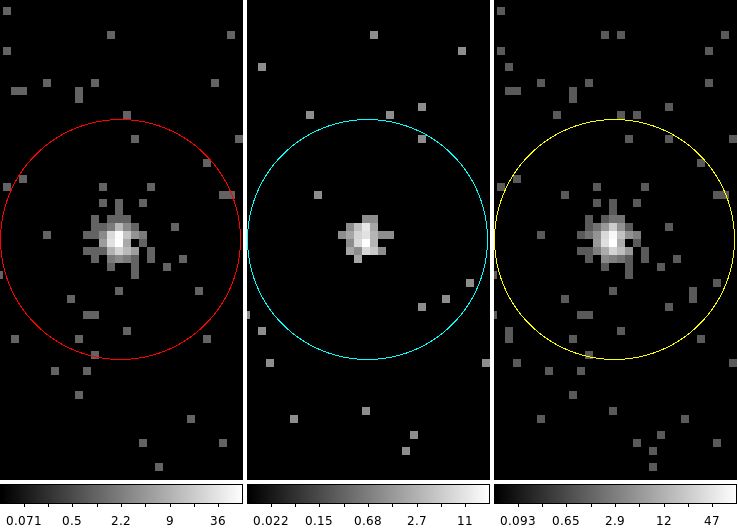

In [45]:
ds9 -tile column -log -zoom to 8 \
  merge_fac/18898_broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 \
  -region format ds9 \
  -region command "circle(4076.225058,4097.3433875,15) # color=red" \
  merge_fac/20056_broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 \
  -region command "circle(4076.225058,4097.3433875,15) # color=cyan" \
  merge_fac/broad_thresh.img -pan to 12:26:51.287 -33:16:13.18 fk5 \
  -region command "circle(4076.225058,4097.3433875,15) # color=yellow"  \
  -saveimage png longer_08.png &

sleep 10
xpaset -p ds9 quit
display < longer_08.png
 

In [46]:
dmstat  "merge_fac/broad_thresh.img[sky=circle(12:26:51,-33:16:13,10)]" cen+ v=0
pget dmstat out_cntrd_phys

punlearn dmcoords
dmcoords merge_fac/broad_thresh.img op=sky x=4076.225058 y=4097.3433875 celfmt=hms v=0
pget dmcoords ra dec


4076.225058,4097.3433875
12:26:51.286
-33:16:13.17


In [47]:
psfsize_srcs merge_fac/18898_broad_thresh.img pos="12:26:51.287,-33:16:13.16" out=merge_fac/18898.src \
  energy=1.0 ecf=0.9 clob+


In [48]:
dmlist merge_fac/18898.src"[cols x,y,r]" data,clean

#  X                    Y                    R
      4076.2039350898      4097.3826648022         1.6945846652


In [50]:
psfsize_srcs merge_fac/20056_broad_thresh.img pos="12:26:51.287,-33:16:13.16" out=merge_fac/20056.src \
    energy=1.0 ecf=0.9 clob+

[1] 55260
[1]+  Done                    ds9 -tile -log -zoom to 8 merge_fac/18898_broad_thresh.img -pan to 12:26:51.299 -33:16:13.04 fk5 -region color red -region merge_fac/18898.src merge_fac/20056_broad_thresh.img -pan to 12:26:51.299 -33:16:13.04 fk5 -region color cyan -region merge_fac/20056.src -saveimage png longer_09.png


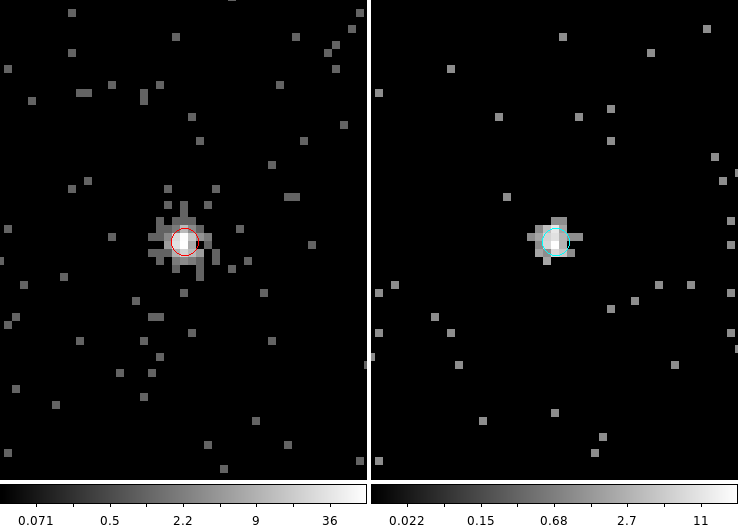

In [51]:
ds9 \
  -tile -log -zoom to 8 \
  merge_fac/18898_broad_thresh.img \
  -pan to 12:26:51.299 -33:16:13.04 fk5 \
  -region color red \
  -region merge_fac/18898.src \
  merge_fac/20056_broad_thresh.img \
  -pan to 12:26:51.299 -33:16:13.04 fk5 \
  -region color cyan \
  -region merge_fac/20056.src \
  -saveimage png longer_09.png &

sleep 10
xpaset -p ds9 quit
display < longer_09.png

In [52]:
punlearn srcflux
srcflux \
  infile=@fac_evt2.lis \
  pos="12:26:51.287,-33:16:13.16" \
  srcreg="circle(12:26:51.287,-33:16:13.16,5)" \
  bkgreg="annulus(12:26:51.287,-33:16:13.16,6,12)" \
  out=sf/out \
  bkgresp=no psfmethod=arfcorr conf=0.68 clob+


srcflux
          infile = @fac_evt2.lis
             pos = 12:26:51.287,-33:16:13.16
         outroot = sf/out
           bands = default
          srcreg = circle(12:26:51.287,-33:16:13.16,5)
          bkgreg = annulus(12:26:51.287,-33:16:13.16,6,12)
         bkgresp = no
       psfmethod = arfcorr
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Combining PSF fractions together
Getting net rate 

In [53]:
cat sf/out_summary.txt




Summary of merged source fluxes

      Position                               0.5 - 7.0 keV                           
                                             Value        68% Conf Interval          
#0001|12 26 51.28 -33 16 13.1 Rate           0.00757 c/s (0.00721,0.00794)           
  NumObi=2                    Mod.Flux       7.52E-14 erg/cm2/s (7.16E-14,7.89E-14)  
                              Unabs Mod.Flux 8.25E-14 erg/cm2/s (7.85E-14,8.65E-14)  



In [56]:
regphystocel in="circle(4076.225058,4097.3433875,5)" out=src.reg wcsfile=merge_fac/broad_thresh.img cl+
cat src.reg

regphystocel
          infile = circle(4076.225058,4097.3433875,5)
         outfile = src.reg
         wcsfile = merge_fac/broad_thresh.img
            text = 
             tag = 
         clobber = yes
         verbose = 1
            mode = ql

# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(12:26:51.2861,-33:16:13.1793,2.46") #  


In [58]:
regphystocel in="annulus(4076.225058,4097.3433875,6,12)" out=bkg.reg wcsfile=merge_fac/broad_thresh.img cl+

cat bkg.reg

regphystocel
          infile = annulus(4076.225058,4097.3433875,6,12)
         outfile = bkg.reg
         wcsfile = merge_fac/broad_thresh.img
            text = 
             tag = 
         clobber = yes
         verbose = 1
            mode = ql

# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
annulus(12:26:51.2861,-33:16:13.1793,2.952",5.904") #  


## Multi srcs, multi obi


In [59]:
find_chandra_obsid "NGC1960"

# obsid  sepn   inst grat   time    obsdate piname     target
21168     0.1 ACIS-I NONE   17.8 2018-12-26 Getman "NGC 1960"
22031     0.1 ACIS-I NONE   21.8 2018-12-27 Getman "NGC 1960"
22032     0.1 ACIS-I NONE   14.9 2019-01-01 Getman "NGC 1960"
22033     0.1 ACIS-I NONE   11.9 2019-01-06 Getman "NGC 1960"


In [60]:
/bin/rm -rf 21168 22031 22032 22033
download_chandra_obsid 21168,22031,22032,22033 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       31 Mb  ####################          < 1 s  41414.6 kb/s
  asol     fits        4 Mb  ####################          < 1 s  26985.7 kb/s
  mtl      fits      706 Kb  ####################          < 1 s  17121.5 kb/s
  stat     fits      439 Kb  ####################          < 1 s  21787.1 kb/s
  bias     fits      438 Kb  ####################          < 1 s  20776.5 kb/s
  bias     fits      437 Kb  ####################          < 1 s  21293.9 kb/s
  bias     fits      436 Kb  ####################          < 1 s  21809.9 kb/s
  bias     fits      436 Kb  ####################          < 1 s  18270.7 kb/s
  aqual    fits      268 Kb  ####################          < 1 s  14096.6 kb/s
  cntr_img jpg       237 Kb  ####################          < 1 s  15771.1 kb/s
  vv       pdf        72 Kb  ####################    

In [61]:
chandra_repro 21168,22031,22032,22033 out= clob+


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/fluxes_multiobi/21168'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/fluxes_multiobi/21168/repro/acisf21168_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...

Cleaning up intermediate files

The data have been reprocessed.
Start your analysis with the new products in
/proj/sds/Staff/kjg/Threads/fluxes_multiobi/21168/repro


Processing input directory '/proj/sds/Staff/kjg/Threads/fluxes_multiobi/22031'

No boresight correction update to asol file 

In [62]:
merge_obs 21168,22031,22032,22033 out=merge/ bin=1 psfecf=0.9 clob+ 

Running merge_obs
Version: 05 November 2021

Found 21168/repro/acisf21168_repro_evt2.fits
Found 22031/repro/acisf22031_repro_evt2.fits
Found 22032/repro/acisf22032_repro_evt2.fits
Found 22033/repro/acisf22033_repro_evt2.fits
Verifying 4 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=5h 36m 17.099s Dec=34d 8' 20.46"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 21168 2018-12-26  17.8 ACIS-0123   -233.587 156.8  < 3"    -6
2 22031 2018-12-27  21.8 ACIS-0123   -233.587 153.9  < 3"   -14
3 22032 2019-01-01  14.9 ACIS-0123   -233.587 156.3  < 3"   +59
4 22033 2019-01-06  11.9 ACIS-0123   -233.587 157.0  < 3"  +175

Running tasks in parallel with 4 processors.
Reprojecting 4 event files to a common tangent point.
Merging reprojected events files to mer

[1] 15179
[1]+  Done                    ds9 merge/broad_thresh.img -block to 6 -log -saveimage png manyobi_10.png


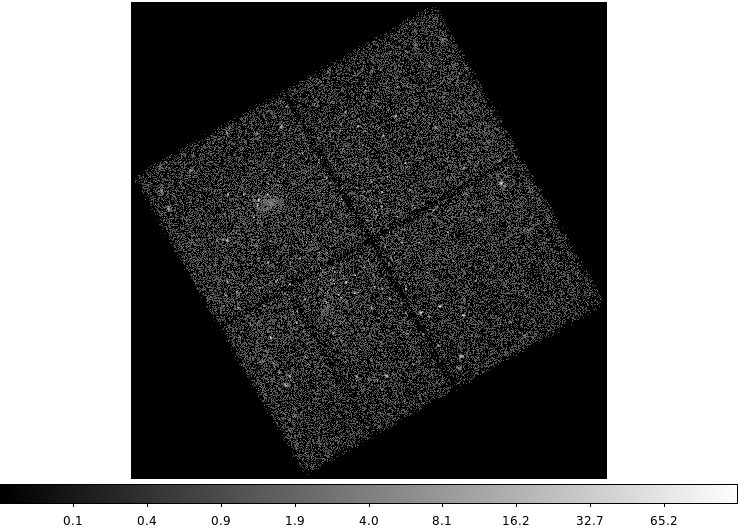

In [63]:
ds9 merge/broad_thresh.img -block to 6 -log \
  -saveimage png manyobi_10.png &

sleep 10
xpaset -p ds9 quit
display < manyobi_10.png


In [64]:
mkdir detect_many

punlearn wavdetect
pset wavdetect \
  infile=merge/broad_thresh.img \
  expfile=merge/broad_thresh.expmap \
  psffile=merge/broad_thresh.psfmap \
  outfile=detect_many/wav.src \
  scales="1.4 2 4 8 12" \
  scell=detect_many/wav.cell defn=detect_many/wav.bkg imagef=detect_many/wav.recon \
  interdir=`pwd`/detect_many/ 

wavdetect mode=h clobber=yes

mkdir: cannot create directory 'detect_many': File exists


[1] 49078
[1]+  Done                    ds9 merge/broad_thresh.img -region detect_many/wav.src -block to 6 -log -saveimage png manyobi_11.png


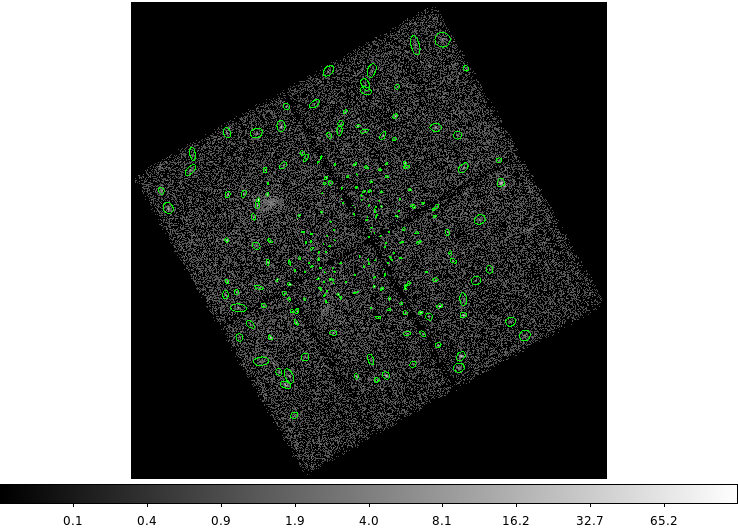

In [65]:
ds9 merge/broad_thresh.img -region detect_many/wav.src -block to 6 -log\
  -saveimage png manyobi_11.png &

sleep 10
xpaset -p ds9 quit
display < manyobi_11.png


In [66]:
dmcopy detect_many/wav.src"[src_significance>20]" detect_many/bright.src clob+
dmlist detect_many/bright.src counts

10      


In [67]:
/bin/ls {21168,22031,22032,22033}/repro/*evt2.fits > evt2.lis
cat evt2.lis

21168/repro/acisf21168_repro_evt2.fits
22031/repro/acisf22031_repro_evt2.fits
22032/repro/acisf22032_repro_evt2.fits
22033/repro/acisf22033_repro_evt2.fits


In [68]:
punlearn srcflux
srcflux \
  infile=@evt2.lis \
  pos=detect_many/bright.src \
  srcreg="" bkgreg="" \
  outroot=sf_many/out \
  bkgresp=no clobber=yes conf=0.68 psfmethod=arfcorr \
  mode=h clob+

srcflux
          infile = @evt2.lis
             pos = detect_many/bright.src
         outroot = sf_many/out
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = no
       psfmethod = arfcorr
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Getting PSF fraction by running arfcorr 3
Getting PSF fraction by running arfcorr 2
Getting PSF fraction by running arfcorr 4
G

Processing OBI 003
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Getting PSF fraction by running arfcorr 3
Getting PSF fraction by running arfcorr 2
Getting PSF fraction by running arfcorr 4
Getting PSF fraction by running arfcorr 5
Getting PSF fraction by running arfcorr 6
Getting PSF fraction by running arfcorr 7
Getting PSF fraction by running arfcorr 8
Getting PSF fraction by running arfcorr 9
Getting PSF fraction by running arfcorr 10
Combining PSF fractions together
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks in parallel with 4 processors.
Running aprates for sf_many/out_obi003_0001_broad_rates.par
Running aprates for sf_many/out_obi003_0002_broad_rates.par
Running aprates for sf_many/out_obi003_0003_broad_rates.par
Running aprates for sf_many/out_obi003_0004_broad_rates.par
Running aprates for sf_many/out_obi003_0005_broad_rates.par
Running aprates for sf_many

                                             Value        68% Conf Interval          
#0001|5 36 2.24 +34 4 41.0    Rate           0.00183 c/s (0.0015,0.0022)             
                              Flux           1.82E-14 erg/cm2/s (1.5E-14,2.2E-14)    
                              Mod.Flux       2.77E-14 erg/cm2/s (2.27E-14,3.34E-14)  
                              Unabs Mod.Flux 4.59E-14 erg/cm2/s (3.77E-14,5.53E-14)  

#0002|5 36 13.97 +34 4 54.7   Rate           0.000294 c/s (0.000168,0.000464)        
                              Flux           9.62E-15 erg/cm2/s (5.5E-15,1.52E-14)   
                              Mod.Flux       4.95E-15 erg/cm2/s (2.83E-15,7.81E-15)  
                              Unabs Mod.Flux 8.21E-15 erg/cm2/s (4.69E-15,1.29E-14)  

#0003|5 35 57.71 +34 5 0.2    Rate           0.00224 c/s (0.00187,0.00265)           
                              Flux           4.05E-14 erg/cm2/s (3.39E-14,4.79E-14)  
                              Mod.Flux       3.35E-1

                              Mod.Flux       4.28E-14 erg/cm2/s (3.59E-14,5.03E-14)  
                              Unabs Mod.Flux 7.09E-14 erg/cm2/s (5.96E-14,8.34E-14)  

#0004|5 36 17.98 +34 5 38.7   Rate           0.000772 c/s (0.000545,0.00105)         
                              Flux           2.7E-15 erg/cm2/s (1.91E-15,3.68E-15)   
                              Mod.Flux       1.19E-14 erg/cm2/s (8.39E-15,1.62E-14)  
                              Unabs Mod.Flux 1.97E-14 erg/cm2/s (1.39E-14,2.68E-14)  

#0005|5 36 33.39 +34 6 5.1    Rate           0.00122 c/s (0.000933,0.00156)          
                              Flux           1.39E-14 erg/cm2/s (1.06E-14,1.77E-14)  
                              Mod.Flux       5.88E-14 erg/cm2/s (4.49E-14,7.53E-14)  
                              Unabs Mod.Flux 9.73E-14 erg/cm2/s (7.43E-14,1.25E-13)  

#0006|5 36 22.80 +34 6 7.3    Rate           0.000227 c/s (0.000114,0.000392)        
                              Flux           1.92E-


#0008|5 36 17.87 +34 6 31.8   Rate           0.00192 c/s (0.00174,0.0021)            
  NumObi=4                    Mod.Flux       2.92E-14 erg/cm2/s (2.64E-14,3.2E-14)   
                              Unabs Mod.Flux 4.84E-14 erg/cm2/s (4.38E-14,5.3E-14)   

#0009|5 36 40.84 +34 10 14.1  Rate           0.00366 c/s (0.0034,0.00392)            
  NumObi=4                    Mod.Flux       5.72E-14 erg/cm2/s (5.32E-14,6.13E-14)  
                              Unabs Mod.Flux 9.47E-14 erg/cm2/s (8.81E-14,1.01E-13)  

#0010|5 36 11.47 +34 10 37.4  Rate           0.00112 c/s (0.000976,0.00126)          
  NumObi=4                    Mod.Flux       1.71E-14 erg/cm2/s (1.49E-14,1.92E-14)  
                              Unabs Mod.Flux 2.83E-14 erg/cm2/s (2.48E-14,3.19E-14)  



In [69]:
wget https://cxc.cfa.harvard.edu/ciao/threads/fluxes_multiobi/plotit.py
python plotit.py

--2022-02-23 13:48:05--  https://cxc.cfa.harvard.edu/ciao/threads/fluxes_multiobi/plotit.py
Resolving cxc.cfa.harvard.edu (cxc.cfa.harvard.edu)... 131.142.198.51
Connecting to cxc.cfa.harvard.edu (cxc.cfa.harvard.edu)|131.142.198.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2029 (2.0K)
Saving to: 'plotit.py.1'

100%[======================================>] 2,029       --.-K/s   in 0s      

2022-02-23 13:48:05 (114 MB/s) - 'plotit.py.1' saved [2029/2029]



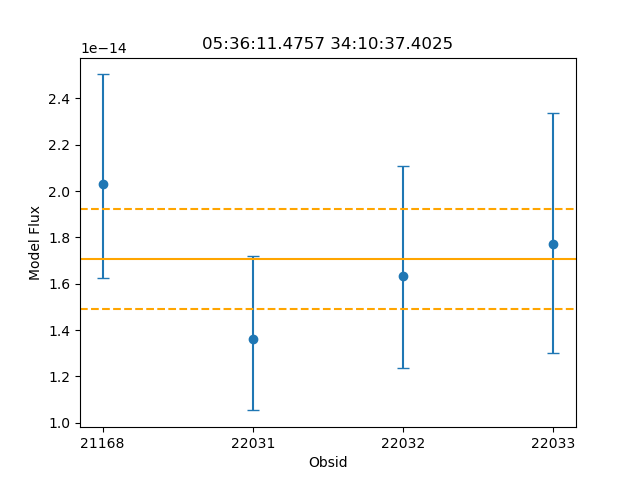

In [70]:
display < plot_10.png

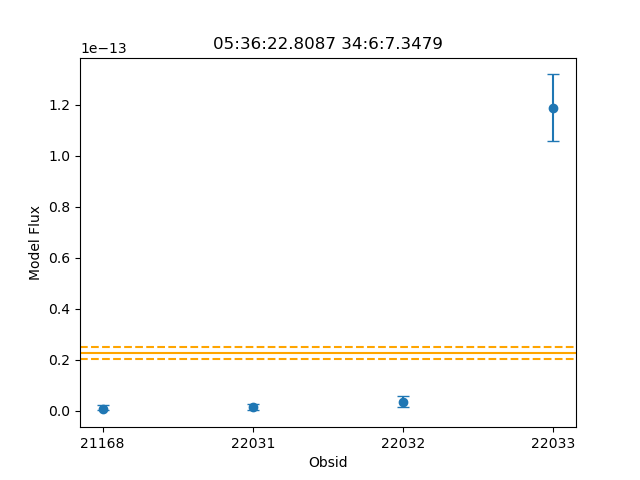

In [71]:
display < plot_6.png

[1] 12930
[1]+  Done                    ds9 -tile column -log 21168/repro/acisf21168_repro_evt2.fits -region sf_many/out_obi001_broad.flux 22031/repro/acisf22031_repro_evt2.fits -region sf_many/out_obi002_broad.flux 22032/repro/acisf22032_repro_evt2.fits -region sf_many/out_obi003_broad.flux 22033/repro/acisf22033_repro_evt2.fits -region sf_many/out_obi004_broad.flux -pan to 05:36:22.809 34:06:07.2869 fk5 -bin to 1 -zoom to 8 -match frame wcs -saveimage manyobi_14.png


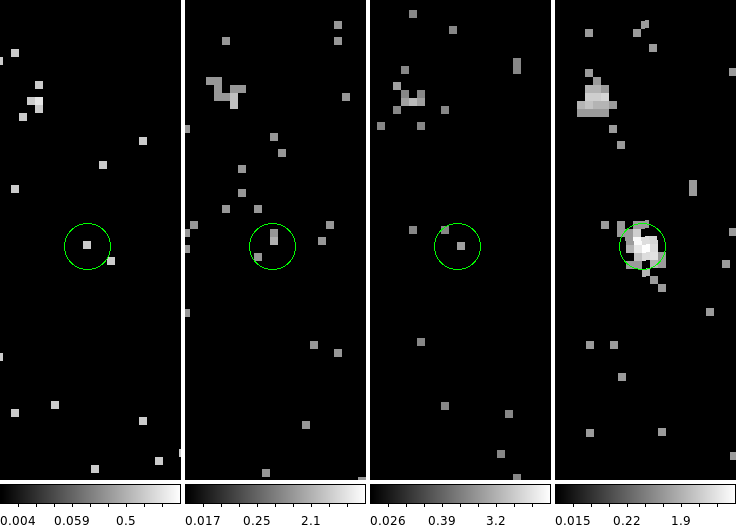

In [72]:
ds9 -tile column -log \
  21168/repro/acisf21168_repro_evt2.fits \
  -region sf_many/out_obi001_broad.flux \
  22031/repro/acisf22031_repro_evt2.fits \
  -region sf_many/out_obi002_broad.flux \
  22032/repro/acisf22032_repro_evt2.fits \
  -region sf_many/out_obi003_broad.flux \
  22033/repro/acisf22033_repro_evt2.fits \
  -region sf_many/out_obi004_broad.flux \
  -pan to 05:36:22.809 34:06:07.2869 fk5 \
  -bin to 1 -zoom to 8 \
  -match frame wcs \
  -saveimage manyobi_14.png &

sleep 10
xpaset -p ds9 quit
display < manyobi_14.png

In [73]:
mkdir roi
punlearn roi
roi \
  infile=detect_many/bright.src \
  outsrc=roi/bright_%02d.fits \
  group=indi target=target \
  compute_conf- clob+ mode=h


mkdir: cannot create directory 'roi': File exists


In [74]:
/bin/ls roi

bright_03.fits	       bright_12.fits.bkgreg  bright_19.fits.srcreg
bright_03.fits.bkgreg  bright_12.fits.srcreg  bright_25.fits
bright_03.fits.srcreg  bright_17.fits	      bright_25.fits.bkgreg
bright_04.fits	       bright_17.fits.bkgreg  bright_25.fits.srcreg
bright_04.fits.bkgreg  bright_17.fits.srcreg  bright_68.fits
bright_04.fits.srcreg  bright_18.fits	      bright_68.fits.bkgreg
bright_05.fits	       bright_18.fits.bkgreg  bright_68.fits.srcreg
bright_05.fits.bkgreg  bright_18.fits.srcreg  bright_74.fits
bright_05.fits.srcreg  bright_19.fits	      bright_74.fits.bkgreg
bright_12.fits	       bright_19.fits.bkgreg  bright_74.fits.srcreg


In [75]:
/bin/ls roi/*fits | xargs -I@ regphystocel @ @.srcreg clob+ verb=0
/bin/ls roi/*fits | xargs -I@ regphystocel @"[bkgreg]" @.bkgreg clob+ verb=0

In [76]:
/bin/ls roi/*srcreg > srcreg.lis
/bin/ls roi/*bkgreg > bkgreg.lis


In [77]:
punlearn srcflux
srcflux \
  infile=@evt2.lis \
  pos=detect_many/bright.src \
  outroot=sf2_many/out \
  srcreg=@srcreg.lis \
  bkgreg=@bkgreg.lis \
  bkgresp=no clobber=yes conf=0.68 psfmethod=arfcorr \
  mode=h clob+


srcflux
          infile = @evt2.lis
             pos = detect_many/bright.src
         outroot = sf2_many/out
           bands = default
          srcreg = @srcreg.lis
          bkgreg = @bkgreg.lis
         bkgresp = no
       psfmethod = arfcorr
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Getting PSF fraction by running arfcorr 2
Getting PSF fraction by running arfcorr 3
Getting PSF fraction

Appending photflux results onto output
Computing Net fluxes
Adding model fluxes to output
Scaling model flux confidence limits
Processing OBI 003
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Getting PSF fraction by running arfcorr 2
Getting PSF fraction by running arfcorr 3
Getting PSF fraction by running arfcorr 4
Getting PSF fraction by running arfcorr 5
Getting PSF fraction by running arfcorr 6
Getting PSF fraction by running arfcorr 7
Getting PSF fraction by running arfcorr 8
Getting PSF fraction by running arfcorr 9
Getting PSF fraction by running arfcorr 10
Combining PSF fractions together
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks in parallel with 4 processors.
Running aprates for sf2_many/out_obi003_0001_broad_rates.par
Running aprates for sf2_many/out_obi003_0002_broad_rates.par
Running aprates for sf2_many/out_obi003_0003_broad_rates.par
Running aprates f

Running modeflux for region 9
Using GAL=0.5739 for source 9
Running modeflux for region 10
Using GAL=0.578 for source 10


Summary of source fluxes in OBI 001

      Position                               0.5 - 7.0 keV                           
                                             Value        68% Conf Interval          
#0001|5 36 2.24 +34 4 41.0    Rate           0.00201 c/s (0.00168,0.00239)           
                              Flux           5.41E-14 erg/cm2/s (4.52E-14,6.42E-14)  
                              Mod.Flux       3.12E-14 erg/cm2/s (2.6E-14,3.7E-14)    
                              Unabs Mod.Flux 5.16E-14 erg/cm2/s (4.31E-14,6.13E-14)  

#0002|5 36 13.97 +34 4 54.7   Rate           0.000305 c/s (0.000183,0.000469)        
                              Flux           1.32E-14 erg/cm2/s (7.9E-15,2.02E-14)   
                              Mod.Flux       5.17E-15 erg/cm2/s (3.1E-15,7.95E-15)   
                              Unabs Mod.Flux 8.57E-15 erg/cm2/s (

                              Unabs Mod.Flux 2.51E-14 erg/cm2/s (1.78E-14,3.39E-14)  

#0003|5 35 57.71 +34 5 0.2    Rate           0.00253 c/s (0.00212,0.003)             
                              Flux           3.43E-14 erg/cm2/s (2.87E-14,4.06E-14)  
                              Mod.Flux       3.83E-14 erg/cm2/s (3.21E-14,4.53E-14)  
                              Unabs Mod.Flux 6.35E-14 erg/cm2/s (5.32E-14,7.51E-14)  

#0004|5 36 17.98 +34 5 38.7   Rate           0.000653 c/s (0.000444,0.000909)        
                              Flux           NAN erg/cm2/s (NAN,NAN)                 
                              Mod.Flux       1.01E-14 erg/cm2/s (6.84E-15,1.4E-14)   
                              Unabs Mod.Flux 1.67E-14 erg/cm2/s (1.13E-14,2.32E-14)  

#0005|5 36 33.39 +34 6 5.1    Rate           0.00118 c/s (0.000907,0.00151)          
                              Flux           1.52E-14 erg/cm2/s (1.16E-14,1.93E-14)  
                              Mod.Flux       5.56E-


#0007|5 36 20.05 +34 6 11.6   Rate           0.00233 c/s (0.00213,0.00253)           
  NumObi=4                    Mod.Flux       3.54E-14 erg/cm2/s (3.23E-14,3.84E-14)  
                              Unabs Mod.Flux 5.86E-14 erg/cm2/s (5.36E-14,6.36E-14)  

#0008|5 36 17.87 +34 6 31.8   Rate           0.00196 c/s (0.00178,0.00214)           
  NumObi=4                    Mod.Flux       2.99E-14 erg/cm2/s (2.71E-14,3.26E-14)  
                              Unabs Mod.Flux 4.95E-14 erg/cm2/s (4.5E-14,5.4E-14)    

#0009|5 36 40.84 +34 10 14.1  Rate           0.00348 c/s (0.00324,0.00372)           
  NumObi=4                    Mod.Flux       5.44E-14 erg/cm2/s (5.06E-14,5.83E-14)  
                              Unabs Mod.Flux 9.01E-14 erg/cm2/s (8.38E-14,9.65E-14)  

#0010|5 36 11.47 +34 10 37.4  Rate           0.00112 c/s (0.000984,0.00125)          
  NumObi=4                    Mod.Flux       1.71E-14 erg/cm2/s (1.5E-14,1.92E-14)   
                              Unabs Mod.Flux 2.83E

In [78]:
ds9 -tile column -log \
  21168/repro/acisf21168_repro_evt2.fits \
  -region sf2_many/out_obi001_broad.flux \
  22031/repro/acisf22031_repro_evt2.fits \
  -region sf2_many/out_obi002_broad.flux \
  22032/repro/acisf22032_repro_evt2.fits \
  -region sf2_many/out_obi003_broad.flux \
  22033/repro/acisf22033_repro_evt2.fits \
  -region sf2_many/out_obi004_broad.flux \
  -pan to 05:36:22.809 34:06:07.2869 fk5 \
  -bin to 1 -zoom to 8 \
  -match frame wcs \
  -saveimage png manyobi_15.png &

sleep 10
xpaset -p ds9 quit
display < manyobi_15.png

[1] 40442
[1]+  Done                    ds9 -tile column -log 21168/repro/acisf21168_repro_evt2.fits -region sf2_many/out_obi001_broad.flux 22031/repro/acisf22031_repro_evt2.fits -region sf2_many/out_obi002_broad.flux 22032/repro/acisf22032_repro_evt2.fits -region sf2_many/out_obi003_broad.flux 22033/repro/acisf22033_repro_evt2.fits -region sf2_many/out_obi004_broad.flux -pan to 05:36:22.809 34:06:07.2869 fk5 -bin to 1 -zoom to 8 -match frame wcs -saveimage png manyobi_15.png
